In [92]:
import pandas as pd
import numpy as np
import nltk
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [93]:
columns = ['place_code','destination_code','date','review']
reviews = pd.read_csv('captured_reviews.csv',names=columns).dropna()

In [5]:
reviews.head(10)

,place_code,destination_code,date,review
1,g147249,d148915,February 28 2016,Great beach very nice clear water. The fact th...
2,g147249,d148915,February 27 2016,I love this beach because the water was the wa...
3,g147249,d148915,February 25 2016,This was my favorite beach in Aruba. The waves...
4,g147249,d148915,February 25 2016,much better beach then where the hotels are. W...
5,g147249,d148915,February 25 2016,This looks like a good beach to snorkel. We di...
9,g147249,d148915,February 21 2016,This was the most beautiful calm water white s...
10,g147249,d148915,February 19 2016,Its a drive from a hotel zone but definitely w...
12,g147249,d148915,February 19 2016,I loved that beach we arrived very early like ...
13,g147249,d148915,February 19 2016,This beach is breath taking. The water is gorg...
14,g147249,d148915,February 19 2016,Easy to get to just north of the high rises. G...


In [94]:
reviews['place_code'].value_counts()

g147293    4029
g147249    2710
g147367    2021
g147365    1638
g666621     526
g317146     434
g488162     250
g147264     228
g147342     170
Name: place_code, dtype: int64

In [95]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [97]:
reviews.describe()

,place_code,destination_code,date,review
count,12006,12006,12006,12006
unique,9,12,35,11635
top,g147293,d215733,2016-02-08 00:00:00,It was the best beach in Grand Cayman; however...
freq,4029,4029,3190,37
first,NaN,NaN,2016-02-08 00:00:00,NaN
last,NaN,NaN,2016-03-13 00:00:00,NaN


# LDA

### Use the 'text-only' version of the parsed reviews to explore if there are any significant topics that are relevant, essentially trying to discover what people are talking about in the reviews of the different destinations.

In [115]:
cv = CountVectorizer(binary=False, max_df=.7)

In [116]:
review_text_only = [unicode(review_text, errors='ignore') for review_text in open('captured_reviews_text_only.txt', 'r')]
docs = cv.fit_transform(review_text_only)
id2word = dict(enumerate(cv.get_feature_names()))
corpus = Sparse2Corpus(docs, documents_columns = False)
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=4)

In [106]:
print(docs)

  (12, 811)	1
  (12, 4167)	1
  (21, 650)	1
  (135, 4420)	1
  (139, 2018)	1
  (141, 496)	1
  (256, 3195)	1
  (257, 2778)	1
  (258, 1646)	1
  (259, 4184)	1
  (395, 2004)	1
  (395, 4578)	1
  (400, 1462)	1
  (404, 4753)	1
  (410, 4408)	1
  (410, 2417)	1
  (410, 2416)	1
  (416, 3958)	1
  (421, 3266)	1
  (423, 1504)	1
  (429, 2140)	1
  (432, 3590)	1
  (434, 4156)	1
  (440, 473)	1
  (444, 4898)	2
  :	:
  (21579, 2036)	1
  (21600, 4510)	1
  (21606, 8)	1
  (21606, 1233)	1
  (21606, 3735)	1
  (21606, 3029)	1
  (21609, 1995)	1
  (21616, 353)	1
  (21616, 1382)	1
  (21616, 2557)	1
  (21616, 3702)	1
  (21631, 2941)	1
  (21634, 13)	1
  (21636, 157)	1
  (21655, 3425)	1
  (21655, 514)	1
  (21655, 794)	1
  (21660, 1003)	1
  (21661, 2103)	1
  (21663, 3882)	1
  (21663, 2647)	1
  (21665, 747)	1
  (21665, 4869)	1
  (21665, 1467)	1
  (21665, 1992)	1


In [91]:
lda_model.show_topics(log=False, formatted=False)

[(0,
  [(u'aninal', 0.0020600404719852213),
   (u'habitats', 0.0020600404719852213),
   (u'acquire', 0.0020600404719852213),
   (u'drenched', 0.0020384282085782156),
   (u'waving', 0.0020384282085782156),
   (u'availale', 0.0020383832326325304),
   (u'wate', 0.0020383832326325304),
   (u'tom', 0.0020383677865344124),
   (u'shauna', 0.0020383677865344124),
   (u'lenny', 0.0020382854242067426)]),
 (1,
  [(u'mufongo', 0.0023579345510437925),
   (u'terrified', 0.0012156351635225519),
   (u'garlic', 0.0012156351635225519),
   (u'plantain', 0.0012156351635225519),
   (u'spelled', 0.0012156351635225519),
   (u'herb', 0.0012156351635225519),
   (u'cracklings', 0.0012156351635225519),
   (u'restaurantssome', 0.0012133187267820273),
   (u'shopschair', 0.0012133187267820273),
   (u'gamesafter', 0.0012133187267820273)]),
 (2,
  [(u'ear', 0.0016873252422783432),
   (u'occupy', 0.0016647159991512424),
   (u'4x4', 0.0016646887520366741),
   (u'5usd', 0.0016645741196287696),
   (u'sportparasalingscuba

In [101]:
#topic_labeler='A'
#topic_data = pd.DataFrame(columns="topic_label, words")
for nextTopic in topics:
    topicIndex, members = nextTopic
    memberWords = members
    print(memberWords+"\n")

0.006*aswell + 0.005*boa + 0.005*constrictors + 0.005*fainting + 0.003*rhum + 0.003*familiesfriend + 0.003*countrysouvenirs + 0.003*prostutes + 0.003*fantasticand + 0.003*pickpockets

0.006*mufongo + 0.003*cracklings + 0.003*terrified + 0.003*spelled + 0.003*herb + 0.003*plantain + 0.003*garlic + 0.003*bajin + 0.003*crusine + 0.003*bbd

0.005*mondays + 0.002*curry + 0.002*spice + 0.002*agaumizukraft + 0.002*caymana + 0.002*peppers + 0.002*listed + 0.002*medeiros + 0.002*thx + 0.002*trustworthy

0.004*cabarate + 0.004*seawall + 0.004*yea + 0.004*lamasemus + 0.004*10usd + 0.004*sosoa + 0.004*mustfrendly + 0.004*maitaining + 0.004*himeslf + 0.004*9am

0.005*hedgehog + 0.005*greedy + 0.005*piglets + 0.005*accessable + 0.005*peurto + 0.005*sunbay + 0.005*unimpressed + 0.005*oistens + 0.005*hospital + 0.005*turqouis

0.005*exclusions + 0.005*flights + 0.005*tromp + 0.005*peolple + 0.003*69 + 0.003*rene + 0.003*crepes + 0.003*tony + 0.003*macaroni + 0.003*puertoplata

0.003*figure + 0.003*any

# K-means

In [120]:
column_names = reviews.columns
scale = StandardScaler(with_mean=False)
X_scale = scale.fit_transform(docs)

/Users/rogeliozuniga/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/rogeliozuniga/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


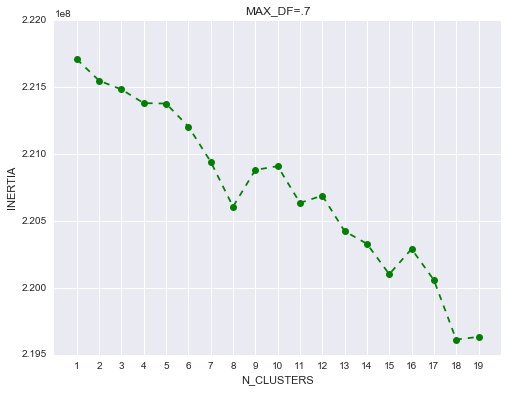

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,20):
    km = KMeans(n_clusters=n)
    km.fit(X_scale)
    x.append(n)
    y.append(km.inertia_)
    
plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('N_CLUSTERS')
plt.ylabel('INERTIA')
plt.title('MAX_DF=.7')
plt.plot(x, y, marker='o',linestyle='--', color='g')
plt.xticks(np.arange(min(x), max(x)+1, 1.0));

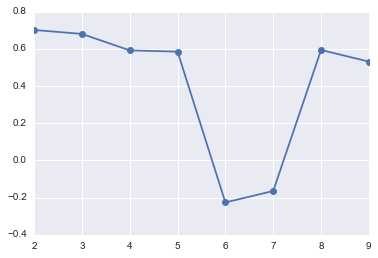

In [123]:
x = []
y = []
for n in range(2,10):
    km2 = KMeans(n_clusters=n)
    centers = km2.fit_predict(X_scale)
    x.append(n)
    y.append(silhouette_score(X_scale, centers))
plt.plot(x, y, marker='o')

In [13]:
km3 = KMeans(n_clusters=5)
five_centers = km3.fit_predict(X_scale)

In [57]:
print(km3.labels_)

[0 0 0 ..., 0 0 0]


In [21]:
km4 = KMeans(n_clusters=2, n_init=20)
km4.fit(X_scale)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): scale.inverse_transform(km4.cluster_centers_[x]) for x in range(0,len(km4.cluster_centers_))}
pd.DataFrame(columns)

,0,1
0,0.003,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
5,0.000,0.000
6,0.000,0.000
7,0.000,0.000
8,0.007,0.000
9,0.002,0.000
